In [ ]:
%pip install geopandas
%pip install contextily
%pip install folium
%pip install folium.plugins

In [1]:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

In [2]:
with zipfile.ZipFile('..\data\interim\ebirdSonora.zip') as z:
    with z.open('ebirdSonora.csv') as f:
        df = pd.read_csv(f)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\4061534289.py:1: SyntaxWarning: invalid escape sequence '\d'
  with zipfile.ZipFile('..\data\interim\ebirdSonora.zip') as z:


# Descriptivo

In [10]:
df.head()

,basisofrecord,institutioncode,collectioncode,catalognumber,occurrenceid,recordedby,year,month,day,publishingcountry,...,class,order,family,genus,specificepithet,scientificname,vernacularname,taxonremarks,taxonconceptid,individualcount
0,HumanObservation,CLO,EBIRD,OBS1000397761,URN:catalog:CLO:EBIRD:OBS1000397761,obsr1203672,2020,10,20,MX,...,Aves,Columbiformes,Columbidae,Columba,livia,Columba livia,Rock Pigeon,NaN,avibase-avibase-BBA263C2,1.0
1,HumanObservation,CLO,EBIRD,OBS1000397738,URN:catalog:CLO:EBIRD:OBS1000397738,obsr1203672,2020,10,20,MX,...,Aves,Passeriformes,Passeridae,Passer,domesticus,Passer domesticus,House Sparrow,NaN,avibase-avibase-240E3390,1.0
2,HumanObservation,CLO,EBIRD,OBS1000397737,URN:catalog:CLO:EBIRD:OBS1000397737,obsr1203672,2020,10,20,MX,...,Aves,Passeriformes,Tyrannidae,Sayornis,saya,Sayornis saya,Say's Phoebe,NaN,avibase-avibase-28669A3D,1.0
3,HumanObservation,CLO,EBIRD,OBS1000397739,URN:catalog:CLO:EBIRD:OBS1000397739,obsr1203672,2020,10,20,MX,...,Aves,Columbiformes,Columbidae,Columbina,inca,Columbina inca,Inca Dove,NaN,avibase-avibase-BFE74235,1.0
4,HumanObservation,CLO,EBIRD,OBS1000397740,URN:catalog:CLO:EBIRD:OBS1000397740,obsr1203672,2020,10,20,MX,...,Aves,Strigiformes,Strigidae,Athene,cunicularia,Athene cunicularia,Burrowing Owl,NaN,avibase-avibase-B9EE9676,1.0


In [11]:
for col in df.columns:
    #print(col,'(',len(df[col].unique()),')')
    #[print(i) for i in df[col].unique()]
    #print(*df[col].unique())
    print(df[col].value_counts())
    print('Unicos',len(df[col].unique()))
    print('*'*50)

basisofrecord
HumanObservation    862409
Name: count, dtype: int64
Unicos 1
**************************************************
institutioncode
CLO    862409
Name: count, dtype: int64
Unicos 1
**************************************************
collectioncode
EBIRD    862409
Name: count, dtype: int64
Unicos 1
**************************************************
catalognumber
OBS1021537345    1
OBS1000397761    1
OBS1000397738    1
OBS1000397737    1
OBS1000397739    1
                ..
OBS1000397751    1
OBS1000397750    1
OBS1000397747    1
OBS1000397746    1
OBS1000397745    1
Name: count, Length: 862409, dtype: int64
Unicos 862409
**************************************************
occurrenceid
URN:catalog:CLO:EBIRD:OBS1021537345    1
URN:catalog:CLO:EBIRD:OBS1000397761    1
URN:catalog:CLO:EBIRD:OBS1000397738    1
URN:catalog:CLO:EBIRD:OBS1000397737    1
URN:catalog:CLO:EBIRD:OBS1000397739    1
                                      ..
URN:catalog:CLO:EBIRD:OBS1000397751    1
URN:catalo

In [11]:
df.describe()

,year,month,day,decimallatitude,decimallongitude,taxonremarks,individualcount
count,862409.000000,862409.000000,862409.000000,862409.000000,862409.000000,0.0,797235.000000
mean,2017.374238,6.570577,15.423820,28.722557,-110.767048,NaN,11.208622
std,8.059620,3.957056,8.471791,1.569332,1.652004,NaN,93.953202
min,1887.000000,1.000000,1.000000,26.324192,-115.052444,NaN,1.000000
25%,2016.000000,3.000000,8.000000,27.103651,-111.453415,NaN,1.000000
50%,2019.000000,6.000000,15.000000,28.461292,-110.927080,NaN,2.000000
75%,2023.000000,11.000000,22.000000,29.183807,-109.083595,NaN,5.000000
max,2024.000000,12.000000,31.000000,32.491627,-108.518930,NaN,18570.000000


In [12]:
df.describe(include='object')

,basisofrecord,institutioncode,collectioncode,catalognumber,occurrenceid,recordedby,publishingcountry,country,stateprovince,county,...,kingdom,phylum,class,order,family,genus,specificepithet,scientificname,vernacularname,taxonconceptid
count,862409,862409,862409,862409,862409,862409,862409,862409,862409,862401,...,862409,862409,862409,862409,862409,862409,862409,862409,862409,862409
unique,1,1,1,862409,862409,2191,1,1,1,71,...,1,1,1,25,77,282,475,545,545,545
top,HumanObservation,CLO,EBIRD,OBS1021537345,URN:catalog:CLO:EBIRD:OBS1021537345,obsr1203672,MX,Mexico,Sonora,Hermosillo,...,Animalia,Chordata,Aves,Passeriformes,Columbidae,Zenaida,mexicanus,Cathartes aura,Turkey Vulture,avibase-avibase-36B3872D
freq,862409,862409,862409,1,1,49396,862409,862409,862409,229734,...,862409,862409,862409,383122,69574,30433,35030,19101,19101,19101


In [21]:
df.isna().sum()

basisofrecord             0
institutioncode           0
collectioncode            0
catalognumber             0
occurrenceid              0
recordedby                0
year                      0
month                     0
day                       0
publishingcountry         0
country                   0
stateprovince             0
county                    8
decimallatitude           0
decimallongitude          0
locality                  0
kingdom                   0
phylum                    0
class                     0
order                     0
family                    0
genus                     0
specificepithet           0
scientificname            0
vernacularname            0
taxonremarks         862409
taxonconceptid            0
individualcount           0
dtype: int64

# Correccion

In [3]:
df[df['county'].isna()][['decimallatitude','decimallongitude']] # Parece ser de una sub isla del tiburon

,decimallatitude,decimallongitude
305363,28.718594,-112.29452
305364,28.718594,-112.29452
305365,28.718594,-112.29452
305366,28.718594,-112.29452
305367,28.718594,-112.29452
305368,28.718594,-112.29452
305369,28.718594,-112.29452
305370,28.718594,-112.29452


In [3]:
df['individualcount']=df['individualcount'].fillna(1)

In [4]:
df['fecha']=pd.to_datetime(df[['year','month','day']])
df['fecha'].describe()

count                           862409
mean     2017-11-16 14:27:12.614686976
min                1887-03-31 00:00:00
25%                2016-03-06 00:00:00
50%                2019-12-14 00:00:00
75%                2023-01-11 00:00:00
max                2024-12-31 00:00:00
Name: fecha, dtype: object

In [5]:
df = df[df['fecha'] >= "1940-01-01"]
df['fecha'].describe()

count                           862329
mean     2017-11-19 14:49:29.618324736
min                1952-11-01 00:00:00
25%                2016-03-06 00:00:00
50%                2019-12-14 00:00:00
75%                2023-01-11 00:00:00
max                2024-12-31 00:00:00
Name: fecha, dtype: object

## eliminar columnas redundantes

In [6]:
df = df.drop(columns=['basisofrecord','institutioncode','collectioncode','catalognumber','occurrenceid','publishingcountry','country','stateprovince','kingdom','phylum','class','scientificname','taxonconceptid','taxonremarks'])
df.head()

,recordedby,year,month,day,county,decimallatitude,decimallongitude,locality,order,family,genus,specificepithet,vernacularname,individualcount,fecha
0,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columba,livia,Rock Pigeon,1.0,2020-10-20
1,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Passeridae,Passer,domesticus,House Sparrow,1.0,2020-10-20
2,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Tyrannidae,Sayornis,saya,Say's Phoebe,1.0,2020-10-20
3,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columbina,inca,Inca Dove,1.0,2020-10-20
4,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Strigiformes,Strigidae,Athene,cunicularia,Burrowing Owl,1.0,2020-10-20


# EDA

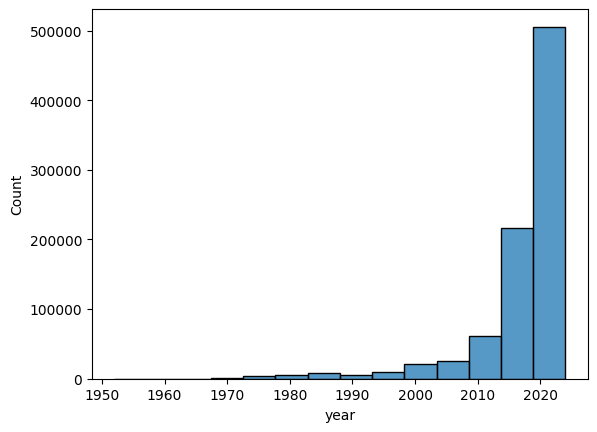

In [60]:
sns.histplot(data=df,x='year',binwidth=5);

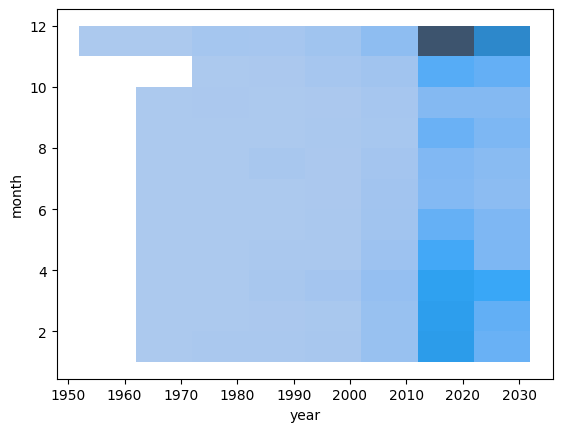

In [61]:
sns.histplot(data=df,x='year',y='month',binwidth=[10,1]);

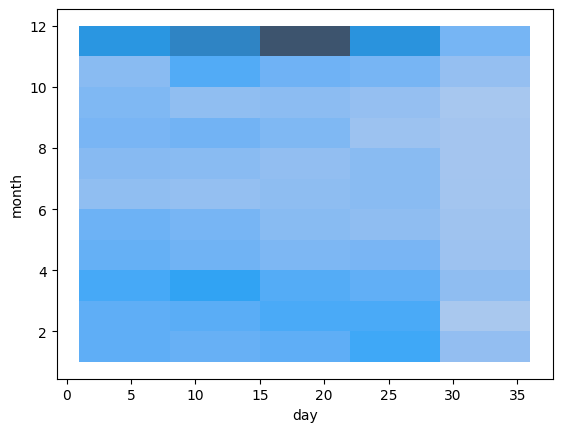

In [62]:
sns.histplot(data=df,x='day',y='month',binwidth=[7,1]);

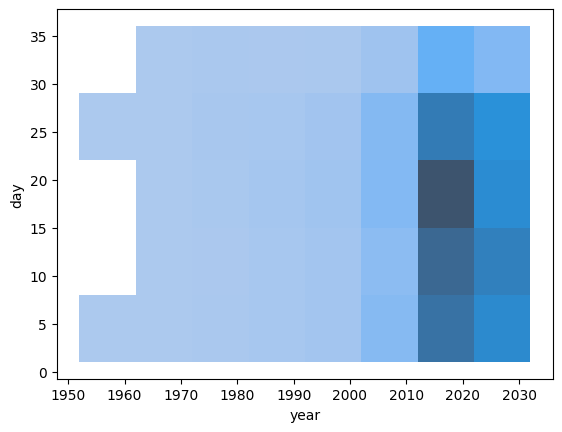

In [63]:
sns.histplot(data=df,x='year',y='day',binwidth=[10,7]);

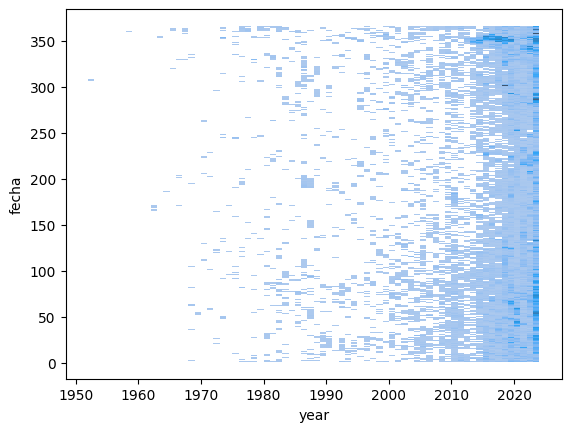

In [64]:
sns.histplot(data=df,x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

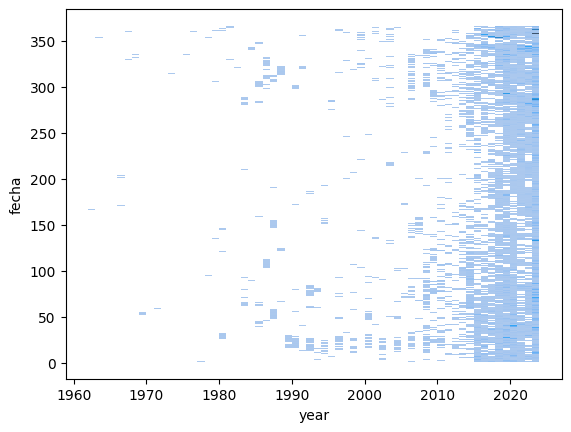

In [65]:
sns.histplot(data=df[df['county']==top_municipios[0]],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

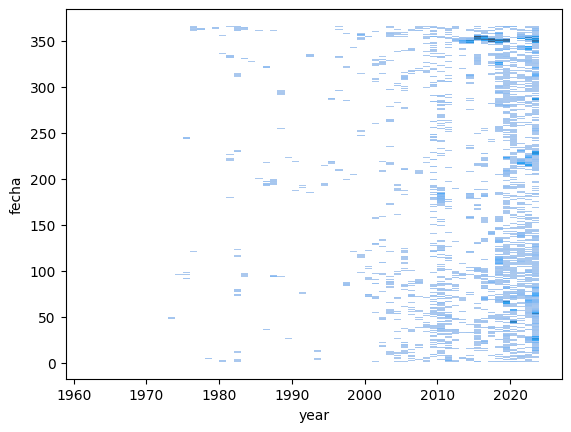

In [66]:
sns.histplot(data=df[df['county']==top_municipios[1]],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

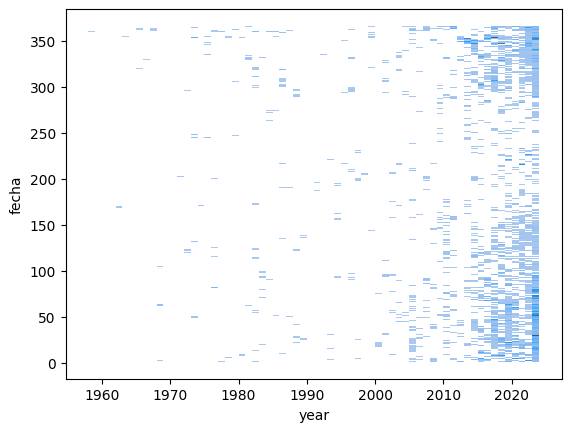

In [67]:
sns.histplot(data=df[df['county']==top_municipios[2]],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

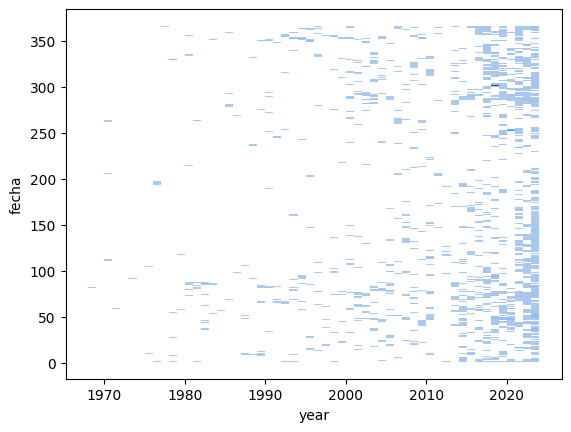

In [68]:
sns.histplot(data=df[df['county']==top_municipios[3]],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

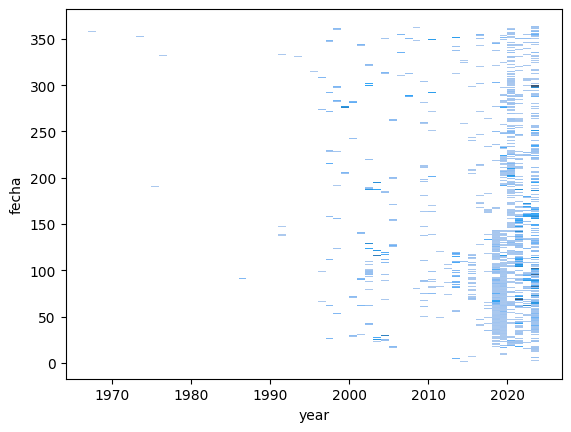

In [69]:
sns.histplot(data=df[df['county']==top_municipios[4]],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

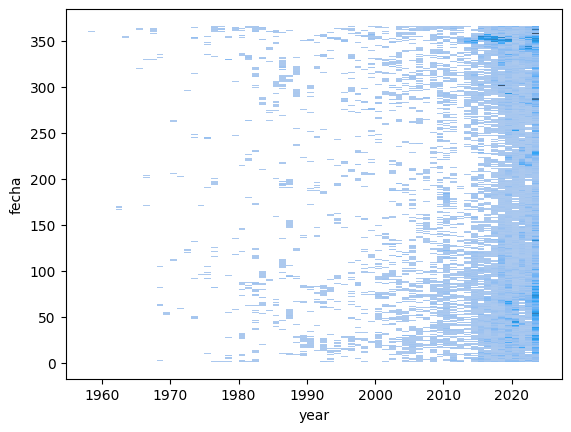

In [70]:
sns.histplot(data=df[df['county'].isin(top_municipios)],x='year',y=df.fecha.dt.dayofyear,binwidth=[1,1]);

In [49]:
presas = pd.read_csv('..\data\processed\datos_hidrologicos_completos.csv',parse_dates=['fecha'])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_21652\510103182.py:1: SyntaxWarning: invalid escape sequence '\d'
  presas = pd.read_csv('..\data\processed\datos_hidrologicos_completos.csv',parse_dates=['fecha'])


In [50]:
presas.head()

,fecha,almacenamiento_hm3,precipitacion_mm,lluvia_mm,evapotranspiracion_mm,temp_media_c,temp_max_c,temp_min_c,horas_precipitacion,viento_max_km_h,viento_medio_km_h,deficit_presion_vapor_kpa,radiacion_solar_mj_m2,humedad_relativa_pct,cobertura_nubes_pct,humedad_suelo_0_100cm,humedad_suelo_0_7cm,humedad_suelo_28_100cm,humedad_suelo_7_28cm,datos_completos
0,1940-01-01,NaN,0.0,0.0,3.19,15.5,23.7,7.9,0.0,11.9,6.8,2.33,14.54,42,41,0.053,0.053,0.051,0.062,False
1,1940-01-02,NaN,0.0,0.0,2.86,15.5,23.3,8.4,0.0,13.0,7.2,2.30,11.71,42,77,0.053,0.053,0.051,0.061,False
2,1940-01-03,NaN,0.0,0.0,3.68,17.0,25.5,9.5,0.0,18.2,9.7,2.60,14.10,42,63,0.053,0.052,0.051,0.061,False
3,1940-01-04,NaN,0.0,0.0,2.75,16.1,22.8,9.2,0.0,13.2,6.5,2.00,11.94,52,68,0.053,0.052,0.051,0.061,False
4,1940-01-05,NaN,0.1,0.1,2.19,15.1,21.0,10.0,1.0,19.8,11.3,1.38,8.83,66,78,0.053,0.052,0.051,0.061,False


<Axes: xlabel='fecha', ylabel='almacenamiento_hm3'>

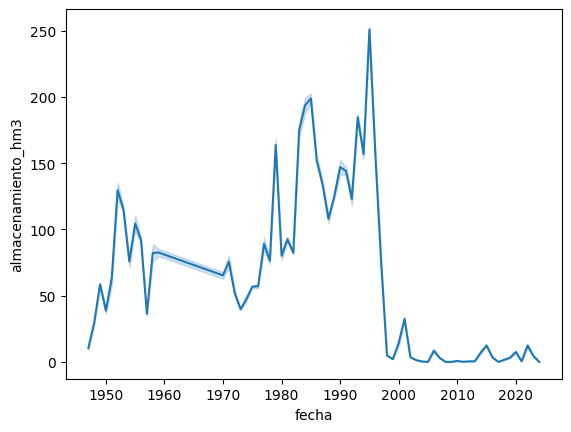

In [52]:
sns.lineplot(data=presas, x=presas.fecha.dt.year,y='almacenamiento_hm3')

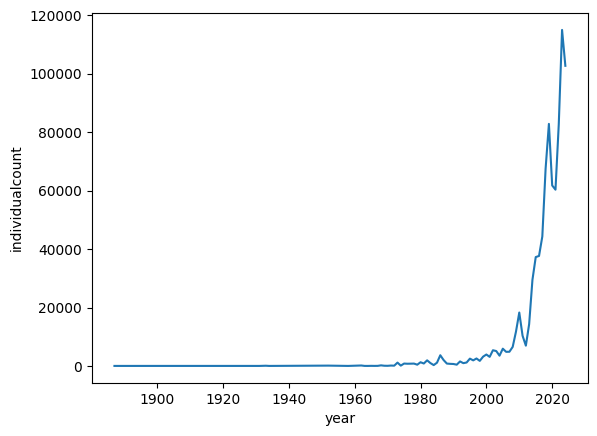

In [7]:
sns.lineplot(data=df.groupby('year').count()[['individualcount']],x='year',y='individualcount');

In [38]:
top_municipios = df.groupby('county').count()[['individualcount']].sort_values('individualcount',ascending=False).head(10).index.to_list()
[print(i) for i in top_municipios];

Hermosillo
Alamos
Guaymas
Puerto Peñasco
San Luis Río Colorado
Huatabampo
Onavas
Yécora
Imuris
Agua Prieta


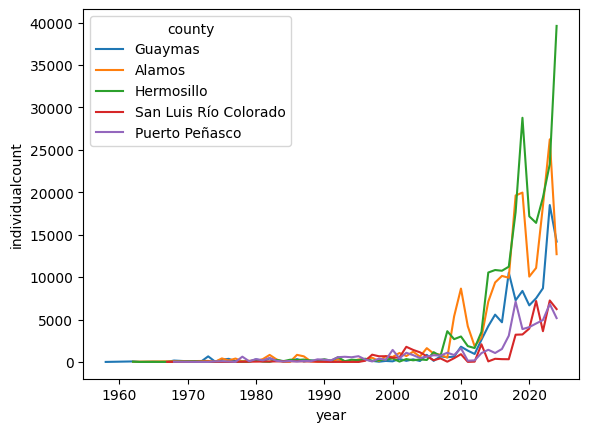

In [73]:
observations_by_year_municipio = df[df['county'].isin(top_municipios)].groupby(['year','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year_municipio,x='year',y='individualcount',hue='county');

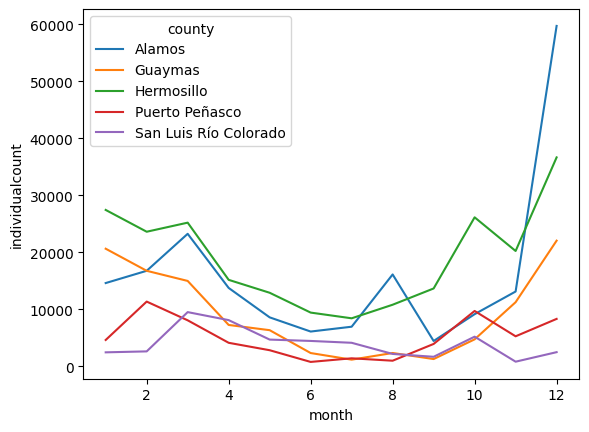

In [74]:
observations_by_year = df[df['county'].isin(top_municipios)].groupby(['month','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year,x='month',y='individualcount',hue='county');

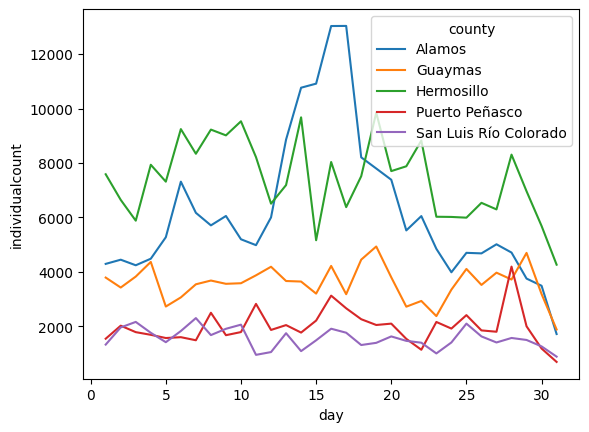

In [75]:
observations_by_year = df[df['county'].isin(top_municipios)].groupby(['day','county']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_year,x='day',y='individualcount',hue='county');

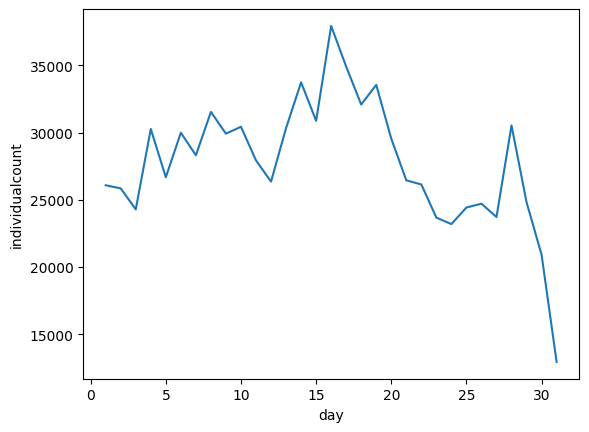

In [76]:
observations_by_year = df.groupby('day').count()[['individualcount']]
sns.lineplot(data=observations_by_year,x='day',y='individualcount');

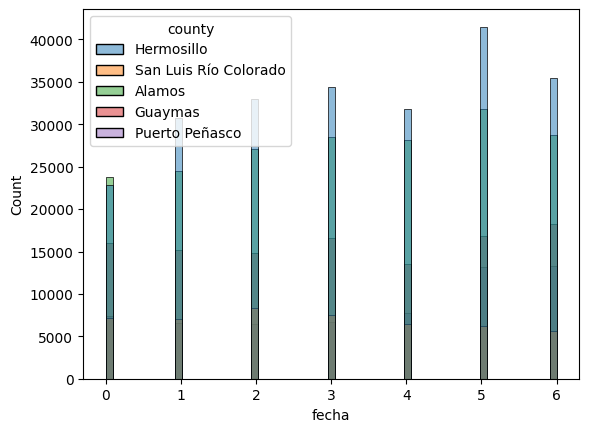

In [77]:
sns.histplot(data = df[df['county'].isin(top_municipios)], x=df.fecha.dt.day_of_week,hue='county');

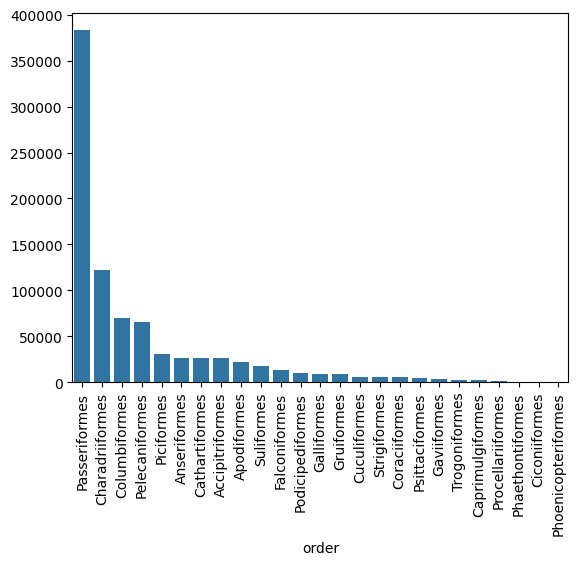

In [44]:
sns.barplot(data=df.groupby('order').size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

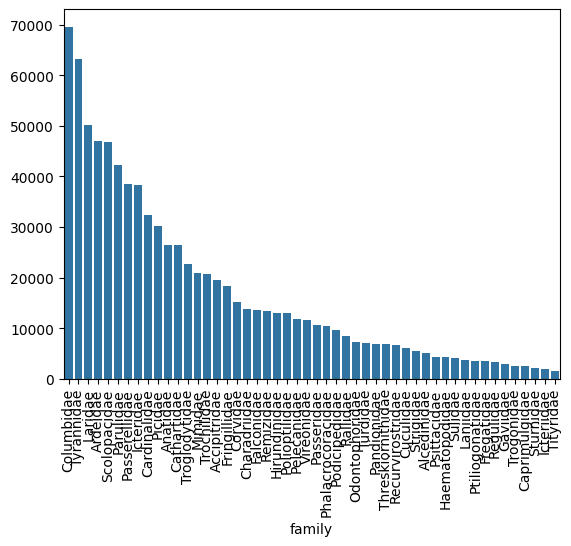

In [ ]:
sns.barplot(data=df.groupby('family').size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

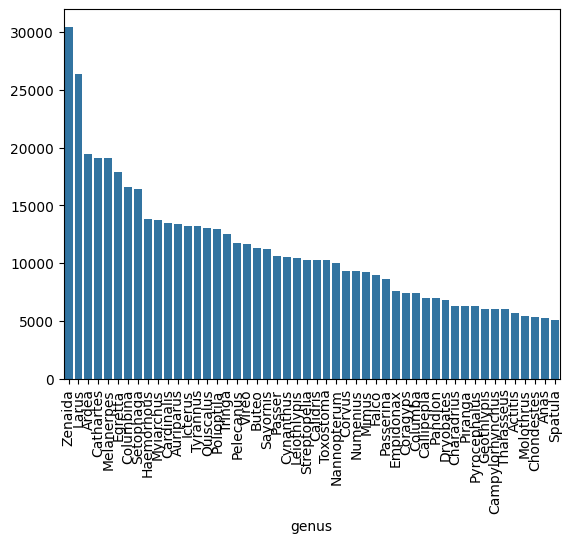

In [ ]:
sns.barplot(data=df.groupby('genus').size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

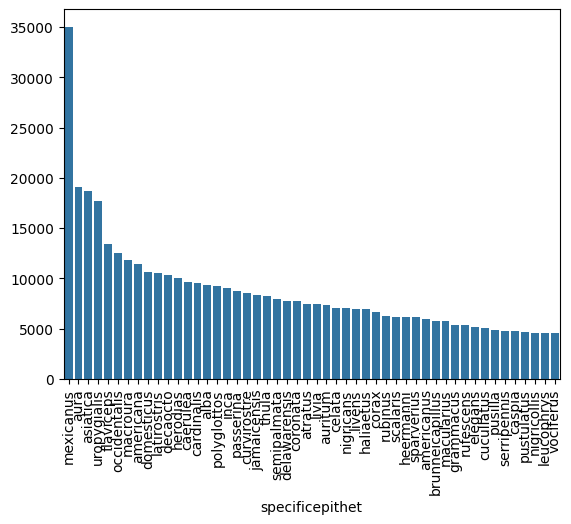

In [ ]:
sns.barplot(data=df.groupby('specificepithet').size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

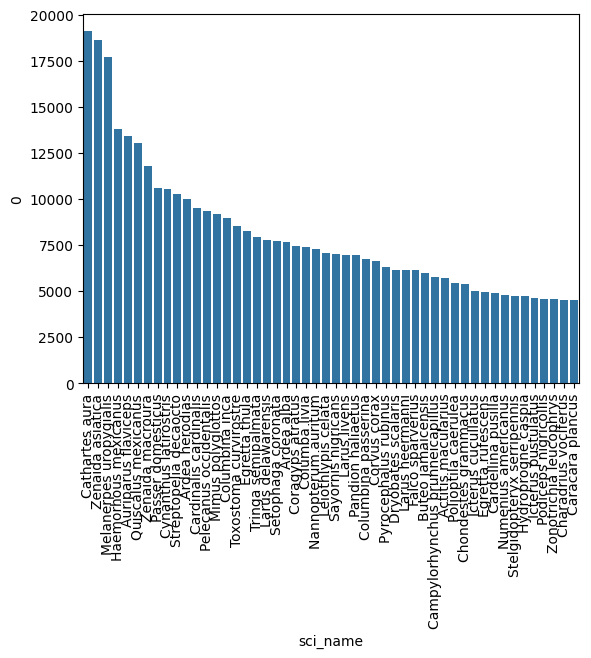

In [43]:
temp_df = df.groupby(['genus','specificepithet']).size().sort_values(ascending=False).head(50).reset_index()
temp_df['sci_name'] = temp_df['genus']+" "+temp_df['specificepithet']
temp_df = temp_df.drop(columns=['genus','specificepithet'])
temp_df = temp_df.set_index('sci_name')
sns.barplot(data=temp_df[0])
plt.xticks(rotation=90);

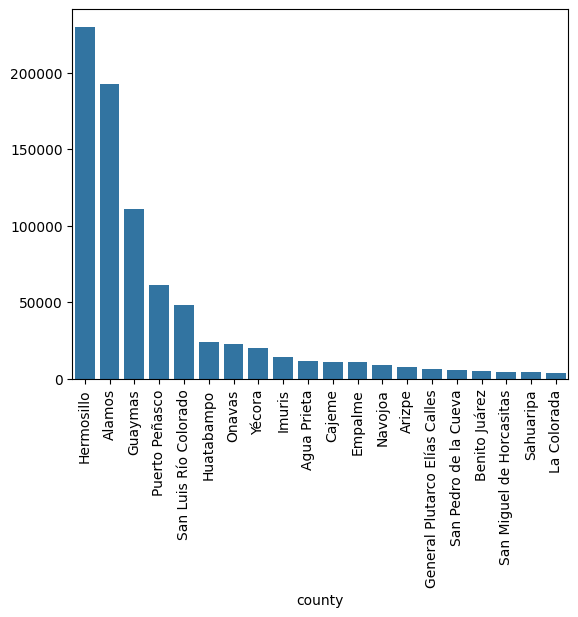

In [90]:
sns.barplot(data=df.groupby('county').size().sort_values(ascending=False).head(20))
plt.xticks(rotation=90);

## Usuarios

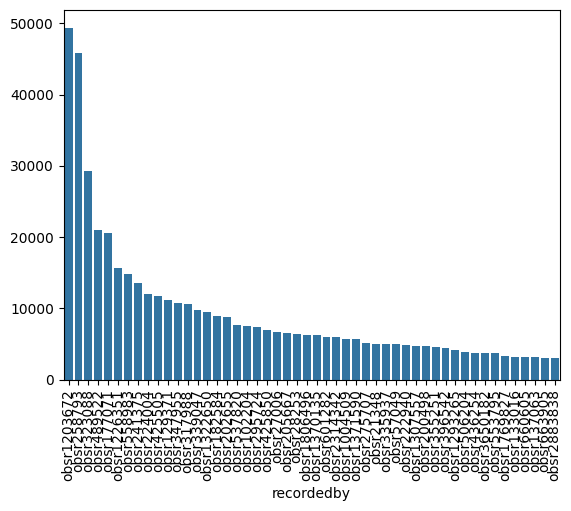

In [93]:
sns.barplot(data=df.groupby('recordedby').size().sort_values(ascending=False).head(50))
plt.xticks(rotation=90);

In [37]:
top_usuarios = df.groupby('recordedby').count()[['individualcount']].sort_values('individualcount',ascending=False).head(20).index.to_list()
[print(i) for i in top_usuarios];

obsr1203672
obsr258793
obsr323088
obsr489522
obsr177071
obsr1226351
obsr558983
obsr241375
obsr224004
obsr425505
obsr129371
obsr347955
obsr317988
obsr339047
obsr1322650
obsr182584
obsr202655
obsr537820
obsr102204
obsr295724


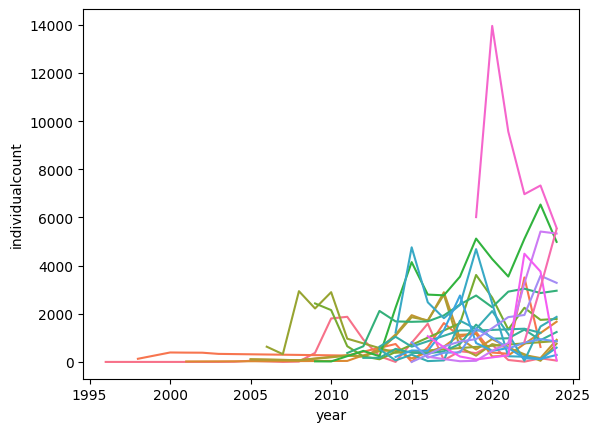

In [48]:
observations_by_user = df[df['recordedby'].isin(top_usuarios)].groupby(['year','recordedby']).count()[['individualcount']].reset_index()
sns.lineplot(data=observations_by_user,x='year',y='individualcount',hue='recordedby',legend=False);

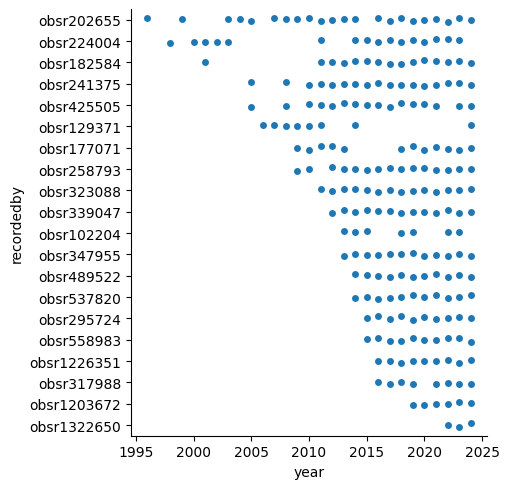

In [49]:
sns.catplot(data=observations_by_user,x='year',y='recordedby')

C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2864375084.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df[df['recordedby'].isin(top_usuarios)][df['county'].isin(top_municipios)],x='county',y='recordedby',binwidth=[1,1])


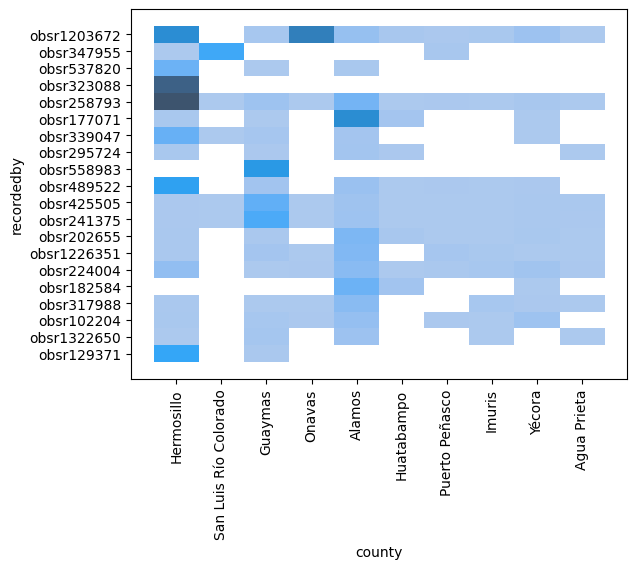

In [39]:
sns.histplot(data=df[df['recordedby'].isin(top_usuarios)][df['county'].isin(top_municipios)],x='county',y='recordedby',binwidth=[1,1])
plt.xticks(rotation=90);

In [7]:
users_df = df.groupby('recordedby').agg({'county':pd.Series.nunique\
    ,'vernacularname':pd.Series.nunique\
    ,'individualcount':sum,'fecha':[min,max]\
    ,'month':pd.Series.mode\
    ,'day':pd.Series.mode\
    , 'locality':pd.Series.count}\
    ).sort_values(('locality','count'),ascending=False)
users_df.head(20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  users_df = df.groupby('recordedby').agg({'county':pd.Series.nunique\
C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  users_df = df.groupby('recordedby').agg({'county':pd.Series.nunique\
C:\Users\DELL\AppData\Local\Temp\ipykernel_28216\2894148279.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavio

county vernacularname individualcount      fecha             \
            nunique        nunique             sum        min        max   
recordedby                                                                 
obsr1203672      44            435        328220.0 2019-01-26 2024-12-31   
obsr258793       47            429        363279.0 2009-06-06 2024-12-31   
obsr323088        2            143        871547.0 2011-03-04 2024-12-18   
obsr489522       38            381        172632.0 2014-02-15 2024-12-26   
obsr177071       12            360         87935.0 2009-02-27 2024-12-28   
obsr1226351      33            399        103788.0 2016-12-11 2024-11-09   
obsr558983        3            261         57321.0 2015-12-14 2024-12-30   
obsr241375       36            367         86846.0 2005-12-27 2024-04-04   
obsr224004       28            370         60263.0 1998-10-02 2023-03-09   
obsr425505       26            363         80502.0 2005-12-27 2024-03-02   
obsr129371        5            248        415299.0 2006-10-13 2024-06-07   
obsr347955        6            239        260387.0 2013-03-22 2024-12-28   
obsr317988       43            360         40836.0 2016-03-19 2024-04-17   
obsr339047       12            353         92620.0 2012-10-20 2024-12-28   
obsr1322650      23            340         53687.0 2022-12-05 2024-11-09   
obsr182584        6            338         71629.0 2001-12-27 2024-12-21   
obsr202655       23            419         67113.0 1996-11-09 2024-12-17   
obsr537820        9            243         49589.0 2014-06-07 2024-12-29   
obsr102204       24            360         46830.0 2013-12-13 2023-08-09   
obsr295724       18            337         69550.0 2015-01-28 2024-07-04   

            month      day locality  
             mode     mode    count  
recordedby                           
obsr1203672    12        4    49396  
obsr258793     12       17    45825  
obsr323088      1       10    29307  
obsr489522      1        1    20932  
obsr177071     12       16    20598  
obsr1226351     9        4    15686  
obsr558983     12       18    14814  
obsr241375     12       16    13509  
obsr224004      3        8    12020  
obsr425505     12       16    11798  
obsr129371      3       28    11229  
obsr347955      4  [7, 25]    10743  
obsr317988     12       24    10602  
obsr339047     12       17     9803  
obsr1322650     7       19     9456  
obsr182584     12        5     8874  
obsr202655      2       21     8792  
obsr537820     12       18     7616  
obsr102204      8       12     7521  
obsr295724      1        8     7324

In [34]:
users_df['rango']=(users_df['fecha']['max']-users_df['fecha']['min']).dt.days
users_df['individuos_por_especie']=users_df['individualcount']['sum']/users_df['vernacularname']['nunique']
users_df['observaciones_por_dia']=users_df['locality']['count']/users_df['rango']
users_df.head()

county vernacularname individualcount      fecha             \
            nunique        nunique             sum        min        max   
recordedby                                                                 
obsr1203672      44            435        328220.0 2019-01-26 2024-12-31   
obsr258793       47            429        363279.0 2009-06-06 2024-12-31   
obsr323088        2            143        871547.0 2011-03-04 2024-12-18   
obsr489522       38            381        172632.0 2014-02-15 2024-12-26   
obsr177071       12            360         87935.0 2009-02-27 2024-12-28   

            month  day locality rango individuos_por_especie  \
             mode mode    count                                
recordedby                                                     
obsr1203672    12    4    49396  2166             754.528736   
obsr258793     12   17    45825  5687             846.804196   
obsr323088      1   10    29307  5038            6094.734266   
obsr489522      1    1    20932  3967             453.102362   
obsr177071     12   16    20598  5783             244.263889   

            observaciones_por_dia  
                                   
recordedby                         
obsr1203672             22.805171  
obsr258793               8.057851  
obsr323088               5.817189  
obsr489522               5.276531  
obsr177071               3.561819

<Axes: xlabel='observaciones_por_dia', ylabel='individuos_por_especie'>

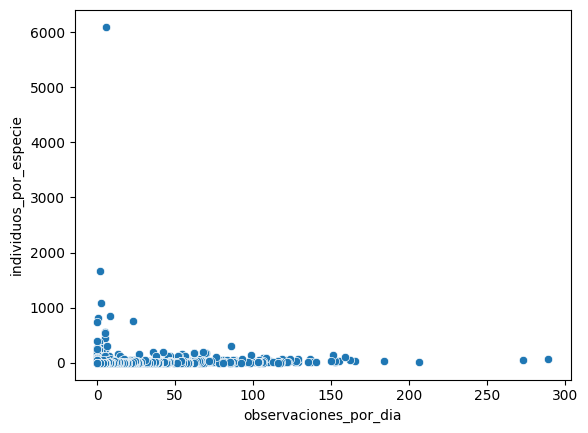

In [35]:
sns.scatterplot(data=users_df,x='observaciones_por_dia',y='individuos_por_especie')

<Axes: xlabel='count', ylabel='nunique'>

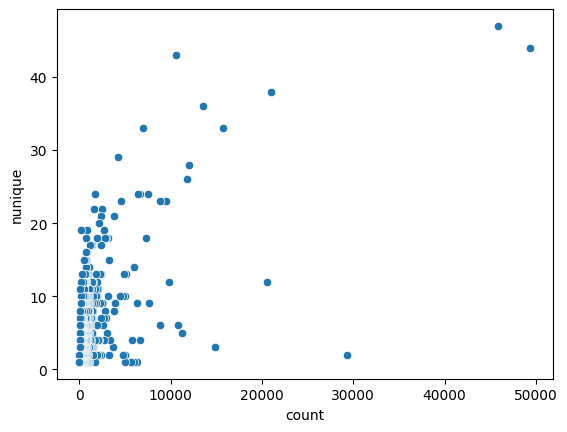

In [27]:
sns.scatterplot(data=users_df,x=users_df['locality']['count'],y=users_df['county']['nunique'])

<Axes: xlabel='nunique', ylabel='sum'>

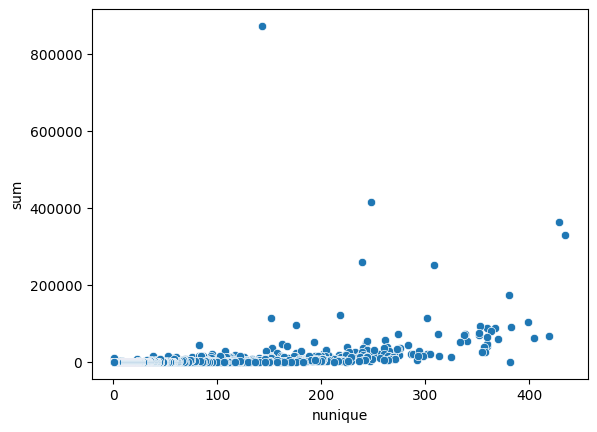

In [28]:
sns.scatterplot(data=users_df,x=users_df['vernacularname']['nunique'],y=users_df['individualcount']['sum'])

# Agrupamiento

In [16]:
np.log(df['individualcount'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
862404    2.302585
862405    1.386294
862406    0.000000
862407    2.708050
862408    0.000000
Name: individualcount, Length: 862409, dtype: float64

In [17]:
presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})
presas_year.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3223081978.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})


scientificname  \
locality                                           year                   
 Real del Alamito                                  2016               1   
"El Oasis", Sonora Mexico                          1986              13   
                                                   1987               9   
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024               1   
#39 solimar San Carlos                             2015              46   

                                                         individualcount  
locality                                           year                   
 Real del Alamito                                  2016              3.0  
"El Oasis", Sonora Mexico                          1986             56.0  
                                                   1987             11.0  
#2200 Sebastián Lerdo de Tejada, San Luis Río C... 2024             70.0  
#39 solimar San Carlos                             2015            277.0

In [18]:
presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})
presas_especies.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\3550804156.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})


,year,scientificname,individualcount
count,11623.000000,11623.000000,11623.000000
mean,1.476125,15.903639,768.812355
std,2.124160,23.672183,8683.294649
min,1.000000,1.000000,0.000000
25%,1.000000,2.000000,5.000000
50%,1.000000,8.000000,29.000000
75%,1.000000,20.000000,126.000000
max,42.000000,260.000000,407977.000000


In [19]:
presas_especies.iloc[presas_especies['year'].argmax()]

year                   42.0
scientificname        248.0
individualcount    407977.0
Name: Estero Santa Cruz, dtype: float64

In [22]:
presas_especies[presas_especies['year']>2].describe()

,year,scientificname,individualcount
count,886.000000,886.000000,886.000000
mean,6.290068,60.902935,7943.029345
std,5.766889,49.654600,30256.937301
min,3.000000,1.000000,0.000000
25%,3.000000,27.000000,238.250000
50%,4.000000,42.000000,566.000000
75%,6.000000,80.000000,2673.250000
max,42.000000,260.000000,407977.000000


In [23]:
df.groupby(['locality','scientificname']).agg({'individualcount':sum})

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1752219432.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['locality','scientificname']).agg({'individualcount':sum})


individualcount
locality                                    scientificname                        
 Real del Alamito                           Colaptes chrysoides                3.0
"El Oasis", Sonora Mexico                   Amphispiza bilineata               6.0
                                            Archilochus alexandri              1.0
                                            Auriparus flaviceps                3.0
                                            Bubo virginianus                   2.0
...                                                                            ...
Ímuris                                      Coragyps atratus                  11.0
                                            Corvus corax                       2.0
                                            Passer domesticus                  1.0
Ímuris (just before, arriving from Cananea) Melanerpes lewis                   1.0
Ímuris--Puente Babadac                      Pandion haliaetus                  1.0

[184848 rows x 1 columns]

In [24]:
def shannon_entropy(group):
    counts = group['individualcount']
    total = counts.sum()
    if total == 0:
        return 0
    p = counts / total
    return -(p * np.log(p)).sum()

In [25]:
biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')
biodiversity.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24024\1804252051.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')


,locality,year,shannon_entropy
0,Real del Alamito,2016,1.098612
1,"""El Oasis"", Sonora Mexico",1986,3.548450
2,"""El Oasis"", Sonora Mexico",1987,2.145842
3,"#2200 Sebastián Lerdo de Tejada, San Luis Río ...",2024,0.693147
4,#39 solimar San Carlos,2015,3.361540


In [ ]:
sns.lineplot(data=biodiversity, x='year', y='shannon_entropy', hue='locality', marker='o')
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

KeyboardInterrupt: 

# Mapa

In [52]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.decimallongitude, df.decimallatitude),
    crs="EPSG:4326"  # WGS84 Lat/Lon coordinate system
)

# Convert to Web Mercator for contextily basemap
gdf = gdf.to_crs(epsg=3857)
gdf.head()

,recordedby,year,month,day,county,decimallatitude,decimallongitude,locality,order,family,genus,specificepithet,vernacularname,individualcount,fecha,geometry
0,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columba,livia,Rock Pigeon,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
1,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Passeridae,Passer,domesticus,House Sparrow,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
2,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Passeriformes,Tyrannidae,Sayornis,saya,Say's Phoebe,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
3,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Columbiformes,Columbidae,Columbina,inca,Inca Dove,1.0,2020-10-20,POINT (-12350002.05 3383437.35)
4,obsr1203672,2020,10,20,Hermosillo,29.061197,-110.941956,Cerro de la Cementera,Strigiformes,Strigidae,Athene,cunicularia,Burrowing Owl,1.0,2020-10-20,POINT (-12350002.05 3383437.35)


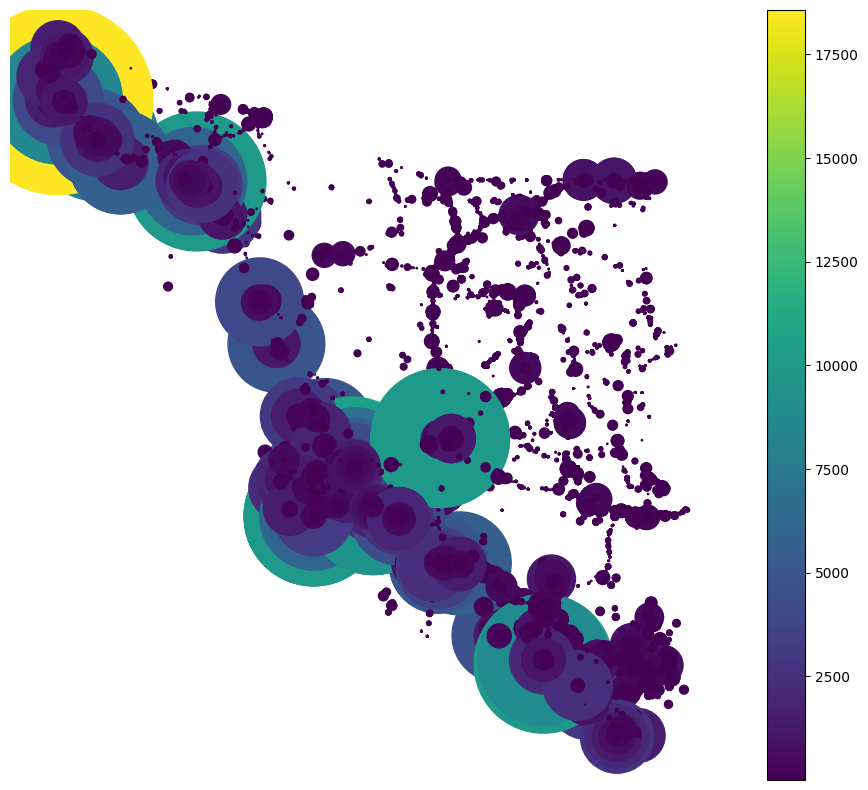

In [53]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='individualcount', cmap='viridis', markersize='individualcount', legend=True, ax=ax)

ax.set_axis_off()

In [ ]:
byGIS = df.groupby(['decimallatitude','decimallongitude'])['individualcount'].sum().reset_index()

# Create a base map centered on average coordinates
m = folium.Map(location=[byGIS.decimallatitude.mean(), byGIS.decimallongitude.mean()], zoom_start=6)

# Use MarkerCluster for better visualization if many points
marker_cluster = MarkerCluster().add_to(m)

# Add points with popup showing Shannon entropy and other info
for _, row in byGIS.iterrows():
    folium.CircleMarker(
        location=[row['decimallatitude'], row['decimallongitude']],
        radius=7,
        popup=f"Total: {row['individualcount']:.2f}",
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Save or display map
m.save('biodiversity_map.html')
m  # if in Jupyter notebook, this will display the interactive map
